In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
names = open("names.txt")
lstnames=[]
salphas=set()
i=1
for name in names:
    name = "." + name.rstrip() + "."
    # print(name)
    lstnames.append(name)
    for ch in name:
        salphas.add(ch)
    i=i+1
itos={}
stoi={}
for i,ch in enumerate(sorted(list(salphas))):
    itos[i] = ch
    stoi[ch] = i


In [3]:
tokenlen=3
xs = []
ys=[]
for name in lstnames:
    token = [0]*tokenlen
    # print(name)
    for ch in name[1:]:    
        # print(xs)
        xs.append(token)
        # print(xs)
        x = stoi[ch]
        ys.append(x)        
        
        # print("".join([itos[j] for j in token]),"---->",itos[x])
        token = token.copy()
        token.append(x)
        token = token[1:]
        # print(token)
       
        
        
X = torch.tensor(xs)
Y = torch.tensor(ys)
X.shape


torch.Size([228146, 3])

In [183]:
g=torch.Generator().manual_seed(2147483647)
C = torch.randn((27,13),generator=g,requires_grad=True)
W1 = torch.randn((39,500),generator=g,requires_grad=True)
b1 = torch.randn(500,generator=g,requires_grad=True)
W2 = torch.randn(500,27,generator=g,requires_grad=True)
b2 = torch.randn(27,generator=g,requires_grad=True)
parameters = [C,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True
n1 = int(round(0.8*X.shape[0],0))
n2 = int(round(0.9*X.shape[0],0))
print(n1)
Xtr = X[:n1,:]
Ytr = Y[:n1]
Xval = X[n1:n2,:]
Yval = Y[n1:n2]
Xtest = X[n2:,:]
Ytest = Y[n2:]


182517


In [ ]:
lrs=10**torch.linspace(-3,0,1000)
losses=[]

In [198]:

for i in range(100000):
    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(128,))
    
    emb=C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,39)@W1+b1)
    logit = h@W2+b2
    # count = logit.exp()
    # probs = count/count.sum(dim=1,keepdims=True)
    # loss = (-torch.log(probs[torch.arange(32),Y])).mean()
    loss = F.cross_entropy(logit,Ytr[ix])
    # losses.append(loss.item())
    for p in parameters:
        p.grad=None
    loss.backward()
    # lr = 0.1 if i<=150000 else 0.01
    lr = 0.001
    # if i>=20000:
    #     lr=0.01
    
    for p in parameters:
        p.data = p.data - lr*p.grad

# print(loss.item())

In [199]:
emb = C[Xtr]
h=torch.tanh(emb.view(-1,39)@W1+b1)
logit = h@W2+b2
loss = F.cross_entropy(logit,Ytr)
print(loss)

tensor(1.8982, grad_fn=<NllLossBackward0>)


In [200]:
emb = C[Xval]
h=torch.tanh(emb.view(-1,39)@W1+b1)
logit = h@W2+b2
loss = F.cross_entropy(logit,Yval)
print(loss)

tensor(2.4650, grad_fn=<NllLossBackward0>)


In [189]:
emb = C[Xtest]
h=torch.tanh(emb.view(-1,39)@W1+b1)
logit = h@W2+b2
loss = F.cross_entropy(logit,Ytest)
print(loss)

tensor(2.6470, grad_fn=<NllLossBackward0>)


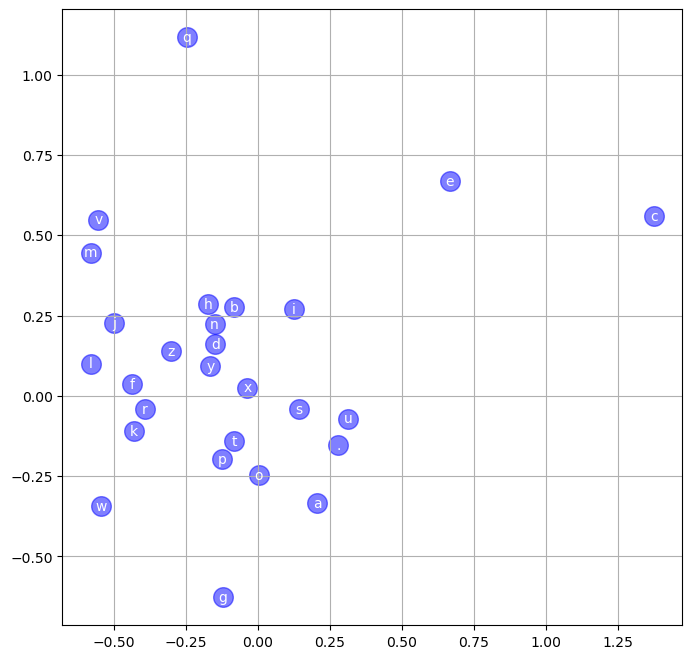

In [121]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,c = ["b"],alpha=0.5,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid('minor')


In [59]:
C[1]

tensor([-0.0820, -0.3241], grad_fn=<SelectBackward0>)

In [104]:
stoi['u']

21

In [180]:
C[21]

tensor([-0.0580, -0.3249, -1.1464, -0.9150,  0.6112, -0.4406,  0.0923, -0.3522,
         0.6740, -1.9930,  2.0115,  0.0964,  0.8268],
       grad_fn=<SelectBackward0>)

In [201]:
g=torch.Generator().manual_seed(2147483647+10)
for _ in range(20):
    out=[]
    context = [0]*tokenlen
    while True:
        # print(torch.tensor([context]))
        emb = C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1)@W1+b1)
        logits = h@W2+b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        out.append(ix)
        context = context[1:]+[ix]
        
        if ix == 0:
            break
    print("".join(itos[i] for i in out))

montaylynn.
seel.
ndhya.
larethrytong.
legrace.
kaielin.
shi.
jenne.
elisso.
aaraelyzion.
kalin.
shubergianaiya.
kin.
renlynn.
novana.
ubakard.
ryyah.
fael.
yuma.
mys.
